In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [4]:
## missing values 
df.isnull()
## here True represent values are not available(eg Nan,null,empty)
## False represent values are available

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()## count the null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
## delete the rows or data points to handle missing values
df.shape

(891, 15)

In [7]:
df.dropna().shape## drop all rows not available data

(182, 15)

In [8]:
## column wise
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values 

<Axes: xlabel='age', ylabel='Count'>

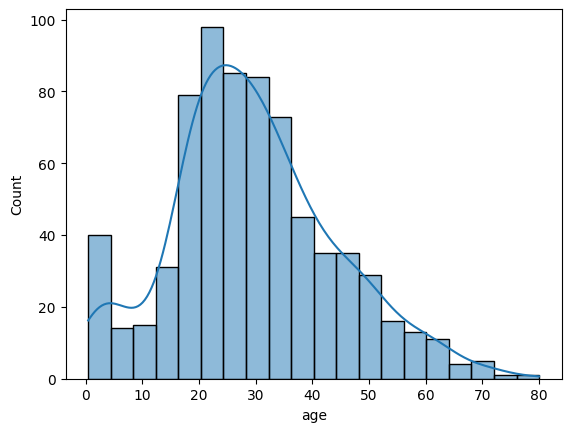

In [9]:
# 1- mean value Imputation
sns.histplot(df['age'],kde=True)

In [10]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [11]:
df[['age_mean','age']]
## mean Imputation works well when we have normally distributed data

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


# 2.Median value Imputation

In [12]:
## if we have outliers in the data sets
df['age_median']=df['age'].fillna(df['age'].median())

In [13]:
df[['age_mean','age_median','age']]

,age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


# 3.Mode Imputation Technique

In [18]:
## it also handle the categorical values

In [14]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [16]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [18]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [19]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [20]:
df['embarked_mode'].isnull().sum()

0

In [21]:
df['embarked'].isnull().sum()

2

# Handling imbalnace Data set
1.Up Sampling

2.Down Sampling

In [22]:
import numpy as np
import pandas as pd

In [23]:
np.random.seed(123)
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [24]:
n_class_1

100

In [25]:
n_class_0

900

In [28]:
## create dataframe with imbalance dataset
class_0=pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [29]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [30]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [31]:
df.tail()

,feature_1,feature_2,target
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1
999,0.697490,0.013570,1


In [33]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

# Up Sampling

In [34]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [36]:
from sklearn.utils import resample
df_minority_sample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [38]:
df_minority_sample.shape

(900, 3)

In [40]:
df_minority.head()

,feature_1,feature_2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1


In [43]:
df_upsampling=pd.concat([df_majority,df_minority_sample])

In [44]:
df_upsampling['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

# Down Sampling

In [46]:
class_0=pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

df=pd.concat([class_0,class_1]).reset_index(drop=True)
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [47]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [50]:
from sklearn.utils import resample
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [51]:
df_majority_downsample.shape

(100, 3)

In [52]:
df_majority.head()


,feature_1,feature_2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0


In [53]:
df_downsampling=pd.concat([df_minority,df_majority_downsample])

In [54]:
df_downsampling['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# SMOTE

In [62]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rampe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [63]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rampe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [65]:
from sklearn.datasets import make_classification


In [67]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [68]:
import pandas as pd


In [69]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head(3)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0


In [70]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

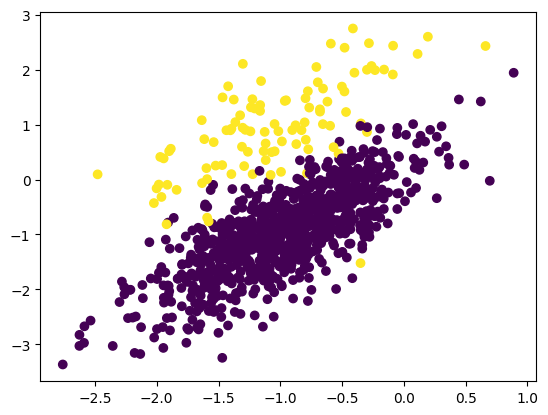

In [71]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [72]:
!pip install imblearn

     ------------------------------------- 226.0/226.0 kB 13.5 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp311-cp311-win_amd64.whl (14.8 MB)
     ---------------------------------------- 42.2/42.2 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 9.8 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)



[notice] A new release of pip available: 22.3 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [74]:
pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rampe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [76]:
import imblearn
print(imblearn.__version__)


0.10.1


In [77]:
pip install --upgrade imblearn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rampe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [78]:
from imblearn.over_sampling import SMOTE


In [79]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [80]:
X.shape

(1800, 2)

In [81]:
y.shape

(1800,)

In [82]:
len(y[y==0])

900

In [83]:
len(y[y==1])

900

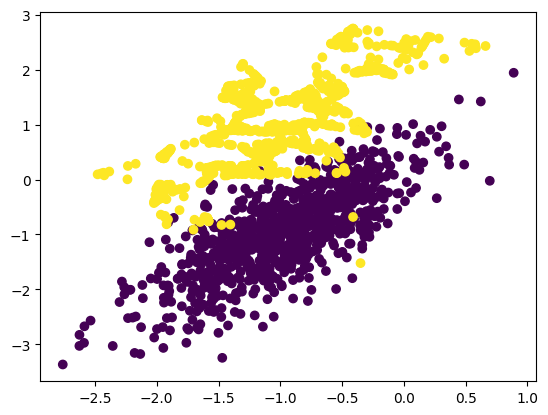

In [84]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

# Data Interpolation

# 1.Linear interpolation

In [86]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

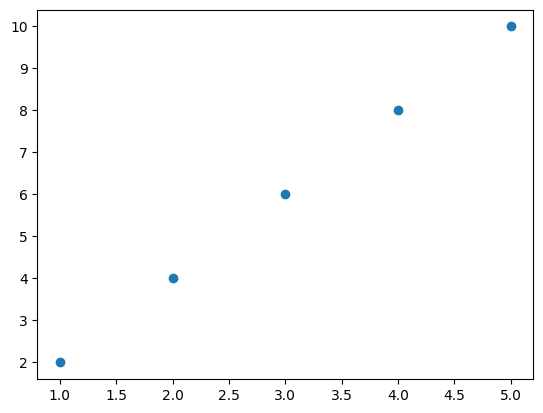

In [87]:
plt.scatter(x,y)

In [88]:
x_new=np.linspace(1,5,10)## create new x values
y_interp=np.interp(x_new,x,y)

In [89]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

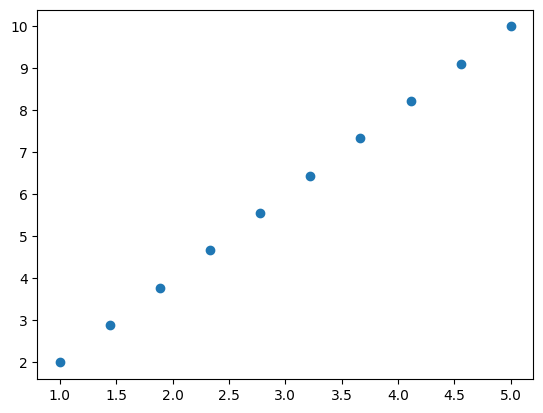

In [91]:
plt.scatter(x_new,y_interp)

# Cublic Interpolation

In [92]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [95]:
from scipy.interpolate import interp1d
import numpy as np

In [96]:
f=interp1d(x,y,kind='cubic')

In [98]:
x_new=np.linspace(1,5,10)
y_interp=f(x_new)

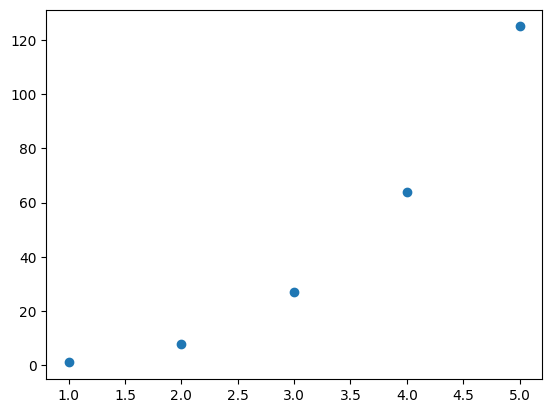

In [99]:
plt.scatter(x,y)

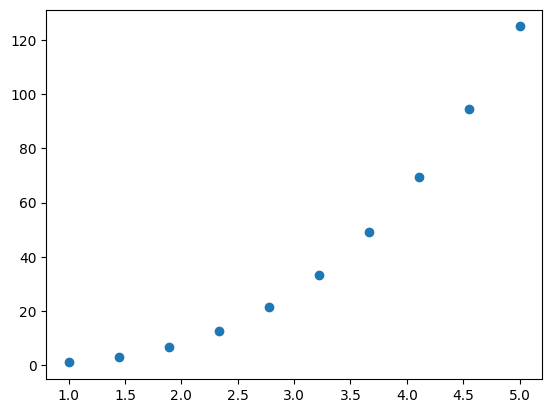

In [100]:
plt.scatter(x_new,y_interp)

# Polynomial Interpolation

In [101]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

In [102]:
p=np.polyfit(x,y,2)

In [103]:
x_new=np.linspace(1,5,10)
y_interp=np.polyval(y,x_new)

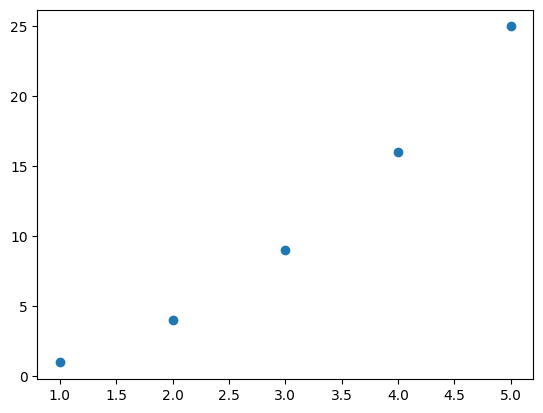

In [104]:
plt.scatter(x,y)

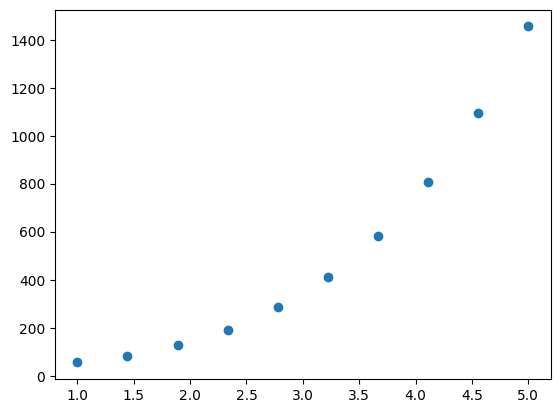

In [105]:
plt.scatter(x_new,y_interp)